In [2]:
# dynamics of rigid body rotation

using DifferentialEquations
using Plots

ω0 = [1.0, 1.0,  0.0] # initial angular frequencies of rotation about principle axes
I = [1., 1.5, 3.3] # moments of inertia 
tspan = (0.0,1000.0) # span of time to simulate

function tendency!(dω, ω, I, t)

    dω[1] =  ω[2]*ω[3] * (I[2]-I[3])/I[1]
    dω[2] =  ω[3]*ω[1] * (I[3]-I[1])/I[2]
    dω[3] =  ω[1]*ω[2] * (I[1]-I[2])/I[3]
    
end


tendency! (generic function with 1 method)

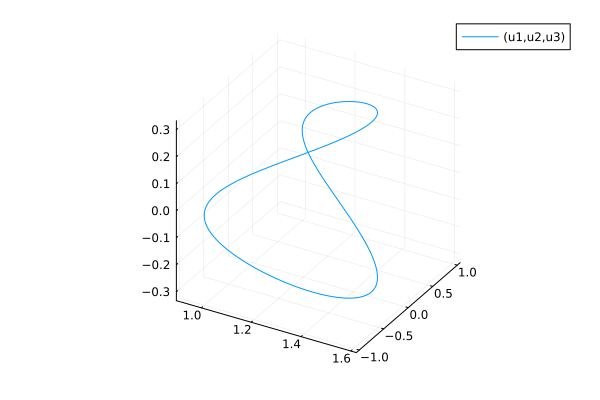

In [3]:
prob = ODEProblem(tendency!, ω0, tspan, I)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plot(sol, idxs = (1, 2, 3))
#plot(sol, idxs = (1, 2))


In [ ]:
println("omega 1 =",  sol[:, 10])
ω1 = sol[1, :] # time series of angular velocity
ω2 = sol[2, :]
ω3 = sol[3, :]
E = 0.5 * (I[1] * ω1 .* ω1 + I[2] * ω2 .* ω2 + I[3] * ω3 .* ω3)

plot(E) # check that energy is conserved

